In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline
import os
import matplotlib.lines as mlines
import datetime


In [25]:

desktop = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop') 
This_file_path = os.getcwd()
total_string_len = len(This_file_path)

string_len_to_remove = len("Data Examination")

path = This_file_path[0:(total_string_len-string_len_to_remove)]
path_processed_data = path + "Processed_data\\"

In [26]:
data = pd.read_csv(path_processed_data + 'real.csv') # Change path
forecast = pd.read_csv(path_processed_data + 'forecast_all1.csv') # Change path
forecast_with_error = pd.read_csv(path_processed_data + 'forecast_all3.csv') # Change path

In [27]:
h = 0
d = 0
col = 'FD1_down'
Forecasts = ["Spot","FD1_down","FD2_down","FD1_up","FD2_up","FD1_up_percentage","FD2_up_percentage","FD1_down_percentage","FD2_down_percentage","FD_act_up","FD_act_down"]
idx_col = np.where(np.array(Forecasts) == col)[0]

In [28]:
scatter_points_mean = [0*24,1*24,2*24,3*24,4*24]
forecasting_time = [4*24] 

In [29]:

# Define the start and end dates
start_date = datetime.datetime(2022, 1, 1, 0, 0, 0)
end_date = datetime.datetime(2023, 3, 31, 23, 0, 0)
# Generate a list of hourly date values
date_range = pd.date_range(start=start_date, end=end_date, freq='H')
# Create a dataframe using the generated date range
df = pd.DataFrame({'Date': date_range})
print(df.loc[0])
print(df.loc[8760])
print(df.loc[10919])

start_date_forecast = datetime.datetime(2022, 1, 1, 0, 0, 0)
end_date_forecast = datetime.datetime(2023, 3, 31, 23, 0, 0)
# Generate a list of hourly date values
date_range_forecast = pd.date_range(start=start_date_forecast, end=end_date_forecast, freq='H')
df_forecast = pd.DataFrame({'Date': date_range_forecast})

print(df_forecast.loc[0])
print(df_forecast.loc[48])

Date   2022-01-01
Name: 0, dtype: datetime64[ns]
Date   2023-01-01
Name: 8760, dtype: datetime64[ns]
Date   2023-03-31 23:00:00
Name: 10919, dtype: datetime64[ns]
Date   2022-01-01
Name: 0, dtype: datetime64[ns]
Date   2022-01-03
Name: 48, dtype: datetime64[ns]


In [30]:
Start = 8760 + 24

In [31]:
D_2_list = [1,2,3,4,5]
start_true_train = (Start+24)-(D_2_list[-1]*24)
end_true_train = (Start+24 + d*24) - 1
start_true_not_used = end_true_train + 1
end_true_not_used = start_true_not_used + 24 - 1
start_true_test = end_true_not_used + 1 #start_true_test = 8760 + (2*24) + (d*24) + 1
end_true_test = start_true_test + 24 - 1

start_forecast = end_true_not_used + 1
end_forecast = start_true_test + 24 - 1


print(start_true_train , ":", end_true_train)
print(start_true_not_used , ":", end_true_not_used)
print(start_true_test , ":", end_true_test)
print(start_forecast, ":", end_forecast)


8688 : 8807
8808 : 8831
8832 : 8855
8832 : 8855


In [41]:
#print(df.loc[start_true_train:end_true_train])
#print(df.loc[start_true_not_used:end_true_not_used])
#print(df.loc[start_true_test:end_true_test])
print(df_forecast.loc[start_forecast:end_forecast])

                    Date
8832 2023-01-04 00:00:00
8833 2023-01-04 01:00:00
8834 2023-01-04 02:00:00
8835 2023-01-04 03:00:00
8836 2023-01-04 04:00:00
8837 2023-01-04 05:00:00
8838 2023-01-04 06:00:00
8839 2023-01-04 07:00:00
8840 2023-01-04 08:00:00
8841 2023-01-04 09:00:00
8842 2023-01-04 10:00:00
8843 2023-01-04 11:00:00
8844 2023-01-04 12:00:00
8845 2023-01-04 13:00:00
8846 2023-01-04 14:00:00
8847 2023-01-04 15:00:00
8848 2023-01-04 16:00:00
8849 2023-01-04 17:00:00
8850 2023-01-04 18:00:00
8851 2023-01-04 19:00:00
8852 2023-01-04 20:00:00
8853 2023-01-04 21:00:00
8854 2023-01-04 22:00:00
8855 2023-01-04 23:00:00


In [33]:
# Define the x axis
total_train_points = 1 + end_true_train-start_true_train
total_not_used_points = 1 + end_true_not_used - start_true_not_used
total_test_points = 1 + end_true_test-start_true_test
print(total_train_points ,total_not_used_points,total_test_points )
x_train_lst = list(range(0, total_train_points  ))
x_not_used_lst = list(range(total_train_points, total_train_points + total_not_used_points  ))
x_test_lst = list(range(total_train_points + total_not_used_points, total_train_points + total_not_used_points + total_test_points ))
print(x_train_lst)
print(x_not_used_lst)
print(x_test_lst)

120 24 24
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]
[120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143]
[144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167]


In [34]:
# Define the data used for the plo
plot_train_data = data[col].loc[start_true_train:end_true_train].reset_index(drop=True).to_frame()
plot_not_used_data = data[col].loc[start_true_not_used:end_true_not_used].reset_index(drop=True).to_frame()
plot_true_data = data[col].loc[start_true_test:end_true_test].reset_index(drop=True).to_frame()
plot_forecasted_data = pd.DataFrame(forecast[col].loc[start_forecast:end_forecast])
plot_forecasted_with_Error_data = pd.DataFrame(forecast_with_error[col].loc[start_forecast:end_forecast])


# Define the scatter plots
mean_points = plot_train_data.loc[scatter_points_mean*24]
#combine_index = plot_data.index.size()

# Define the x axis for the different plots

x_train_axis = pd.DataFrame(x_train_lst)
x_not_used_axis = pd.DataFrame(x_not_used_lst)
x_test_axis = pd.DataFrame(x_test_lst)

plot_forecasted_data = plot_forecasted_data.set_index([pd.Index(x_test_lst)])
plot_forecasted_with_Error_data = plot_forecasted_with_Error_data.set_index([pd.Index(x_test_lst)])
plot_true_data = plot_true_data.set_index([pd.Index(x_test_lst)])
plot_not_used_data = plot_not_used_data.set_index([pd.Index(x_not_used_lst)])

C:\Users\Daniel  BV\AppData\Local\Temp\ipykernel_29228\2352637536.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_test_axis.iloc[0], plot_forecasted_data.iloc[0],c=orange_shades[1])
c:\Users\Daniel  BV\Desktop\Thesis\lightenup\venv\lib\site-packages\matplotlib\text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
c:\Users\Daniel  BV\Desktop\Thesis\lightenup\venv\lib\site-packages\matplotlib\text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y =

c:\Users\Daniel  BV\Desktop\Thesis\lightenup\venv\lib\site-packages\matplotlib\text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
c:\Users\Daniel  BV\Desktop\Thesis\lightenup\venv\lib\site-packages\matplotlib\text.py:1477: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


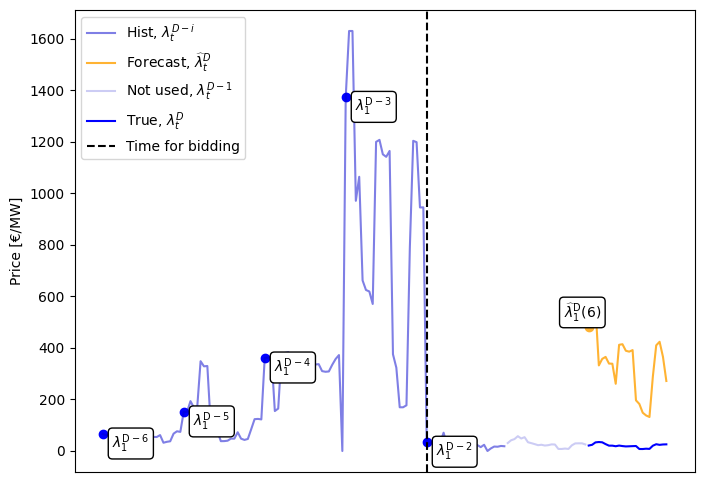

In [35]:
x_list = x_train_axis.loc[scatter_points_mean].values.tolist()
y_list = plot_train_data.loc[scatter_points_mean].values.tolist()
text_list = [r'$\lambda^{\mathrm{D-6}}_{1}$', r"$\lambda^{\mathrm{D-5}}_{1}$", r"$\lambda^{\mathrm{D-4}}_{1}$", r"$\lambda^{\mathrm{D-3}}_{1}$", r"$\lambda^{\mathrm{D-2}}_{1}$"]

# Define RGB values for different shades of blue
blue_shades = [
    (0, 0, 1),        # Pure blue
    (0.4, 0.4, 1),    # Lighter blue
    (0, 0, 0.8),      # Darker blue
]

orange_shades = [
    (1, 0.5, 0),       # Pure orange
    (1, 0.7, 0.2),     # Lighter orange
    (0.8, 0.4, 0),     # Darker orange
]

# Set the figure size and dpi
fig = plt.figure(figsize=(8, 6), dpi=100)

plt.plot(plot_train_data,c=blue_shades[2],alpha=0.5,label="Hist, $\lambda^{D-i}_t$ ")
plt.plot(plot_forecasted_data, label=r"Forecast, $\widehat{\lambda}^{D}_t$",c=orange_shades[1])
#plt.plot(plot_forecasted_with_Error_data, label=r"Forecast + $\epsilon$, f$^{D}_h$",c=orange_shades[1])

plt.plot(plot_not_used_data,c=blue_shades[2],alpha=0.2,label="Not used, $\lambda^{D-1}_t$ ")
plt.plot(plot_true_data, label="True, $\lambda^{D}_t$", c="blue")

# only one line may be specified; full height
plt.axvline(x=forecasting_time, color='black', linestyle='--',label= "Time for bidding")

# Scatter plot with custom text annotations and boxes
for x, y, text in zip(x_list, y_list, text_list):
    #print(x,y,text)
    plt.scatter(x[0],y[0],c="blue")
    plt.annotate(text, (x[0],y[0]), xytext=(7, -10), textcoords='offset points',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black'))

plt.scatter(x_test_axis.iloc[0], plot_forecasted_data.iloc[0],c=orange_shades[1])
plt.annotate(r"$\widehat{\lambda}^{\mathrm{D}}_{1}(6)$", (x_test_axis.iloc[0],plot_forecasted_data.iloc[0]), xytext=(-18, 7), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black'))
# Remove x-axis tick marks and labels
plt.xticks([])

# Add a legend outside of the plots
plt.legend(loc="upper left")

plt.ylabel("Price [\u20AC/MW]")

# Show the plot
plt.savefig('Hourly_mean_forecast.pdf', format="pdf", bbox_inches="tight")
plt.show()

# PLOT OF DIFFERENT FORECASTS

In [36]:
forecast0 = pd.read_csv(path_processed_data + 'forecast_all0.csv') # Change path
forecast1 = pd.read_csv(path_processed_data + 'forecast_all1.csv') # Change path
forecast2 = pd.read_csv(path_processed_data + 'forecast_all2.csv') # Change path
forecast3 = pd.read_csv(path_processed_data + 'forecast_all3.csv') # Change path

plot_forecasted_data1 = pd.DataFrame(forecast1[col].loc[start_forecast:end_forecast])
plot_forecasted_data1 = plot_forecasted_data1.set_index([pd.Index(x_test_lst)])
plot_forecasted_data2 = pd.DataFrame(forecast2[col].loc[start_forecast:end_forecast])
plot_forecasted_data2 = plot_forecasted_data2.set_index([pd.Index(x_test_lst)])
plot_forecasted_data3 = pd.DataFrame(forecast3[col].loc[start_forecast:end_forecast])
plot_forecasted_data3 = plot_forecasted_data3.set_index([pd.Index(x_test_lst)])

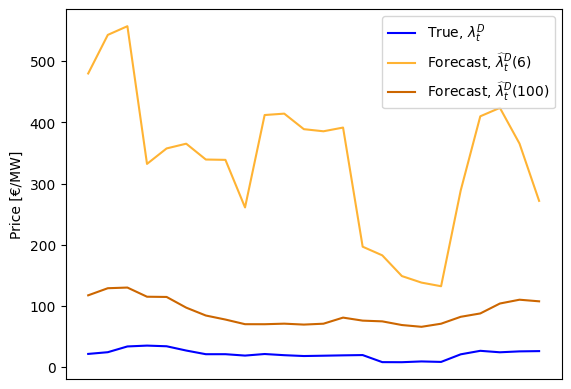

In [37]:
plt.plot(plot_true_data, label="True, $\lambda^{D}_t$", c="blue")
plt.plot(plot_forecasted_data1, label=r"Forecast, $\widehat{\lambda}^{D}_t(6)$",c=orange_shades[1])
plt.plot(plot_forecasted_data3, label=r"Forecast, $\widehat{\lambda}^{D}_t(100)$",c=orange_shades[2])
# Remove x-axis tick marks and labels
plt.xticks([])

# Add a legend outside of the plots
plt.legend(loc="upper right")

plt.ylabel("Price [\u20AC/MW]")

plt.savefig('forecast_with_errors.pdf', format="pdf", bbox_inches="tight")
plt.show()